# Basic numerics and plot

pylab notebook just like namespace

In [1]:
# For interactive plot, please use 
# %pylab notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Commands beginning with % our IPython 'magic' commands. This one sets up a bunch of matplotlib back end and imports numpy into the global namespace. We will do this in all of our notebooks for simplicity. It's actually considered bad form because it puts a lot of numpy functions into the global namespace, but for exploratory work it's very convenient.

To avoid importing everything into the global namespace, one would use instead

In [2]:
#%matplotlib notebook
import numpy as np
import matplotlib as mpl
#mpl.rcParams['figure.dpi']= 150
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

which will make all of the numpy functions, such as array() and sin(), available as np.array(), np.sin(), and the plotting functions such as plot() and xlabel() as plt.plot() and plt.xlabel().

## Numpy Arrays

Numpy arrays store **multidimensional arrays** of objects of a fixed type. The type of an array is a **dtype**, which is a more refined typing system than Python provides. They are efficient maps **from indices (i,j) to values**. They have **minimal memory overhead**.

Arrays are **mutable**: their contents can be changed after they are created. However, their size and dtype, once created cannot be efficiently changed (requires a copy).

Arrays are good for:
1. Representing matrices and vectors (**linear algebra**)
2. Storing grids of numbers (**plotting, numerical analysis**)
3. Storing data series (**data analysis**)
4. Getting/changing slices (regular subarrays)

Arrays are not good for:
1. Applications that require growing/shrinking the size.
2. Heterogenous objects.
3. Non-rectangular data.

Arrays are 0-indexed.

In [3]:
# A vector is an array with 1 index
a = array([1/sqrt(2), 0, 1/sqrt(2)])
a

array([0.70710678, 0.        , 0.70710678])

In [4]:
a.shape

(3,)

In [5]:
a.dtype

dtype('float64')

In [6]:
a.size

3

In [7]:
# We access the elements using [ ]
a[0]

0.7071067811865475

In [8]:
a[0] = a[0]*2

In [9]:
a

array([1.41421356, 0.        , 0.70710678])

We create a 2D array (that is a matrix) by passing the array() function a list of lists of numbers in the right shape.

In [10]:
# A matrix is an array with 2 indices
B = array( [[ 1, 0, 0],
            [ 0, 0, 1],
            [ 0, 1, 0]] )
B

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [11]:
B.shape

(3, 3)

In [12]:
B.dtype

dtype('int64')

In [13]:
B.size

9

In [14]:
B[0,0]

1

**Warning!** There is also a type called 'matrix' instead of 'array' in numpy. This is specially for 2-index arrays but is being removed from Numpy over the next two years because it leads to bugs. **Never use matrix(), only array()**

## Basic Linear Algebra

There are two basic kinds of multiplication of arrays in Python:

1. **Element-wise multiplication:** a*b multiplies arrays of the same shape element by element.
2. **Dot product:** a@b forms a dot product of two vectors or a matrix product of two rectangular matrices. 

Mathematically, for vectors,

$$ a@b = \sum_i a[i] b[i] $$

while for 2D arrays (matrices),

$$ A@B[i,j] = \sum_k A[i,k] B[k,j] $$

In [15]:
a = array([1,  1]) / sqrt(2)
b = array([1, -1]) / sqrt(2)

In [16]:
a

array([0.70710678, 0.70710678])

In [17]:
b

array([ 0.70710678, -0.70710678])

In [18]:
a*a

array([0.5, 0.5])

In [19]:
a@a

0.9999999999999998

In [20]:
# Compute the length of a
norm(a)

0.9999999999999999

In [21]:
sqrt(a@a)

0.9999999999999999

In [22]:
a*b

array([ 0.5, -0.5])

In [23]:
a@b

0.0

There are many, many more functions for doing linear algebra operations numerically provided by numpy and scipy. We will use some of them as we go.

## Basic Plotting

The second primary use of numpy array's is to hold grids of numbers for analyzing and plotting. In this case, we consider a long 1D array with length N as representing the values of the x and y axis of a plot, for example. 

Let's plot a sine wave:

In [24]:
# create an equally spaced array of 100 numbers 
# from -2pi to 2pi 
x = np.linspace(-2*np.pi, 2*np.pi, 100)

# evaluate a function at each point in x and create a 
# corresponding array
y = 0.5*np.sin(x)

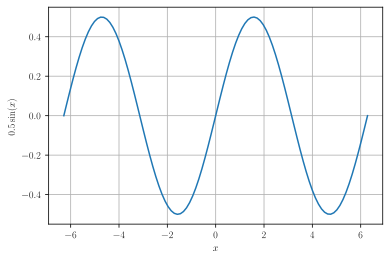

In [25]:
figure()
plot(x,y)
grid()
xlabel(r'$x$')
ylabel(r'$0.5 \sin(x)$')
show()

A few comments:
1. The call to sin(x) is a 'ufunc', which automatically acts element-by-element on whatever shape array it is passed.
2. Matplotlib supports $\LaTeX$ style mathematical expressions in any text that it renders -- just enclose in \$ -signs. We use a raw (r"..") string so that the backslashes are passed onto the $\LaTeX$ interpreter intact rather than being interpreted as special characters.
3. The 'notebook' backend (which we turned on at the beginning of the notebook) provides basic interactive plotting inside the notebook. Try it out. There are other backends which provide somewhat better interaction if you setup jupyter on your local computer.

### Speed ###

In [26]:
L = range(1000)
%timeit [i**2 for i in L]# % is a comment communicate to jupyter, not to python.

279 µs ± 4.72 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [27]:
a = arange(1000)
%timeit a**2

806 ns ± 35.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [28]:
mpl.rcParams['text.usetex']=True # This assigned the font style to be the MathJax style in the plot.
mpl.rcParams['font.family']='Times New Roman'

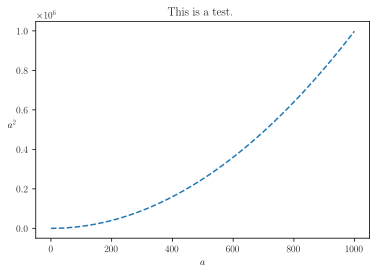

In [46]:
figure()
plot(a, a**2, '--')
title(r'This is a test.')
xlabel(r'$a$')
ylabel(r'$a^2$',rotation=0)# Do not rotate the y axis label.
show()

## Some Common Arrays

In [30]:
arange(2,10,2)

array([2, 4, 6, 8])

In [31]:
# compact notation for the previous
# r_ creates a *row* vector with the contents of the slice 
# notice the [ ] rather than ( )
r_[2:10:2]

array([2, 4, 6, 8])

In [32]:
linspace(2,10,5)

array([ 2.,  4.,  6.,  8., 10.])

In [33]:
# compact notation for the previous
r_[2:10:5j]

array([ 2.,  4.,  6.,  8., 10.])

In [34]:
ones((2,2))

array([[1., 1.],
       [1., 1.]])

In [35]:
zeros((3,1))

array([[0.],
       [0.],
       [0.]])

In [36]:
eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [37]:
diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [38]:
np.random.rand(2,2)

array([[0.80947482, 0.89261187],
       [0.021396  , 0.07445528]])

In [39]:
np.random.exponential(scale=3,size=(3,3))

array([[ 1.72812182, 11.29459947,  4.62183267],
       [ 2.47499787,  2.67545379,  3.34511434],
       [ 0.75359228,  3.57557972,  0.46732403]])

## Array DTypes

Numpy has its own set of data types for the elements of arrays. These **dtypes** are more specific than 'int' or 'str' so that you can control the number of bytes used. 

1. Integers: int16 ('i2'), int32 ('i4'), int64 ('i8'), ...
2. Unsigned: uint32 ('u4'), uint64 ('u8'), ...
3. Float: float16 ('f2'), float32 ('f4'), float64 ('f8'), ...
4. Boolean: bool
5. Fixed Length Strings: 'S1', 'S2', ...


In [40]:
array([1,0]).dtype

dtype('int64')

In [41]:
array([1.,0]).dtype

dtype('float64')

In [42]:
float32

numpy.float32

In [43]:
dtype('i4')

dtype('int32')

## Basic Operations and Visualization

In [44]:
x = linspace(-pi, pi, 100)
y1 = sin(x)
y2 = exp(x/pi)

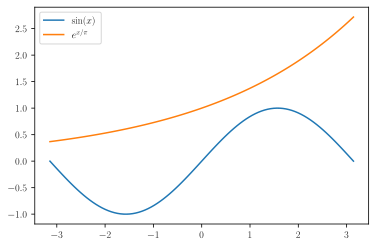

In [47]:
figure()
plot(x,y1, label=r'$\sin(x)$')
plot(x,y2, label=r'$e^{x/\pi}$')
legend(loc='upper left')
show()